# **Used Car Price Prediction with ML**

![Used Car](https://raw.githubusercontent.com/izzet-ozdemir/Used_Car_Price_Prediction/main/dataset-cover.jpg)

## Data Loading and Initial Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Veri setini yükle | Load dataset
data_path = '/kaggle/input/craigslist-carstrucks-data/vehicles.csv'
df = pd.read_csv(data_path)

In [3]:
# İlk 5 satır | First 5 lines
print(df.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [4]:
# Veri setinin boyutu | Size of the dataset
print(f"Veri seti boyutu: {df.shape[0]} kayıt, {df.shape[1]} sütun")

Veri seti boyutu: 426880 kayıt, 26 sütun


## Exploratory Data Analysis (EDA)

In [5]:
# Veri tipi kontrolü | Data type checking
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
# Temel istatistikler | Basic statistics
print(df.describe())

                 id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.

### **Grafiksel Yaklaşım: Mevcut veriler ışığında veri setini grafiksel analiz edelim. |**
### **Graphical Approach: Let's analyze the data set graphically in light of the available data.**

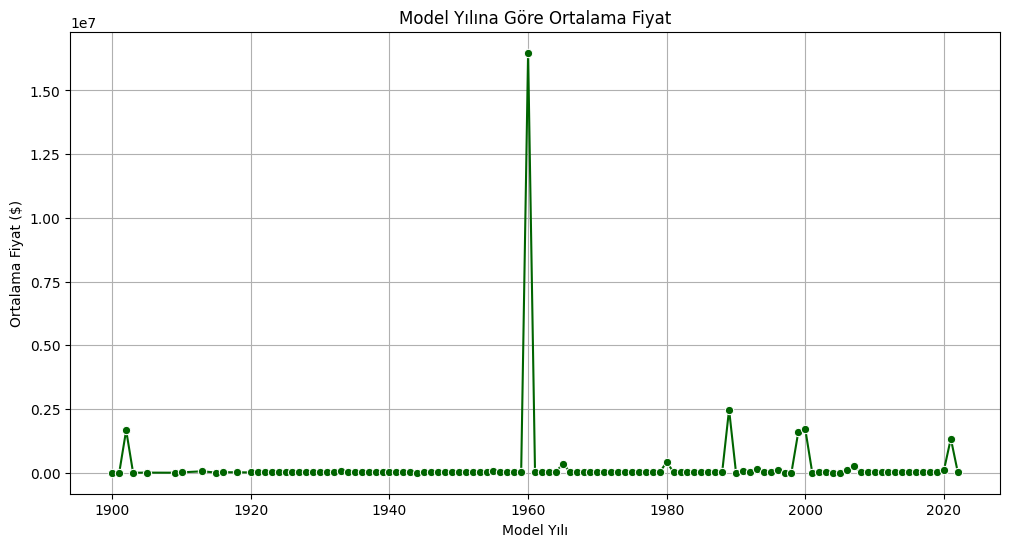

In [7]:
# Model Yılına Göre Ortalama Fiyat | Average Price by Model Year

year_price = df.groupby('year')['price'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='year', y='price', data=year_price, marker='o', color='darkgreen')
plt.title('Model Yılına Göre Ortalama Fiyat')
plt.xlabel('Model Yılı')
plt.ylabel('Ortalama Fiyat ($)')
plt.grid(True)
plt.show()

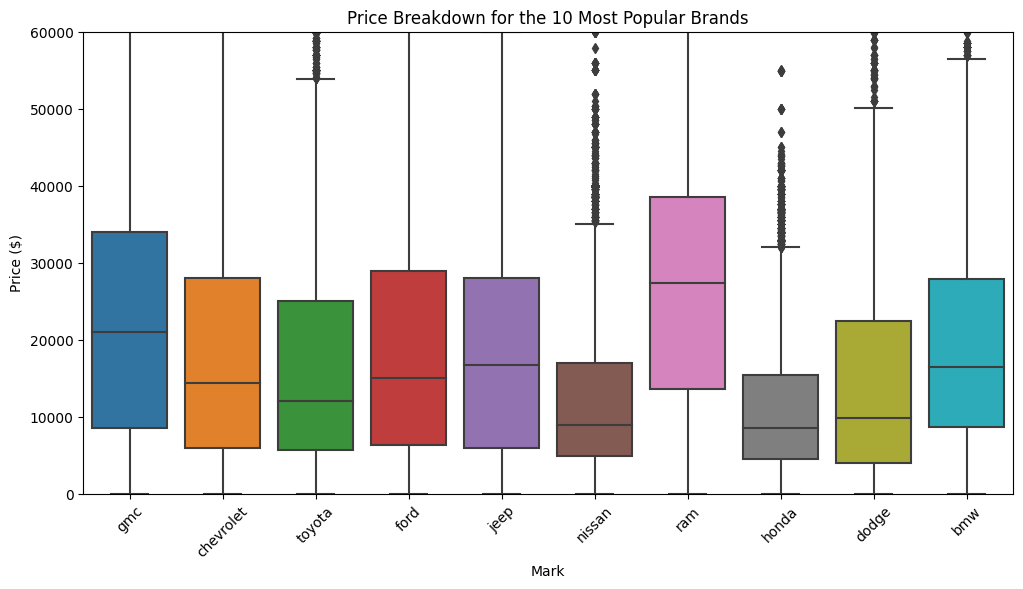

In [8]:
# En Popüler 10 Marka İçin Fiyat Dağılımı | Price Breakdown for the 10 Most Popular Brands


top_brands = df['manufacturer'].value_counts().nlargest(10).index
df_top_brands = df[df['manufacturer'].isin(top_brands)]

# "isin" ifadesi, sadece top_brands listesinde olan markalara ait satırları filtreler
# Yani örneğin sadece Ford, Toyota, Chevrolet gibi en çok geçen 10 markayı alır.

# The expression "isin" filters only rows that contain brands that are in the top_brands list
# So for example, it only takes the top 10 brands that are mentioned the most, such as Ford, Toyota, Chevrolet.

plt.figure(figsize=(12,6))
sns.boxplot(x='manufacturer', y='price', data=df_top_brands)
plt.title('Price Breakdown for the 10 Most Popular Brands')
plt.xlabel('Mark')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
# Aykırı değerlerin etkisini azaltmak için sınırlandırma | Limiting to reduce the impact of outliers
plt.ylim(0, 60000)  
plt.show()

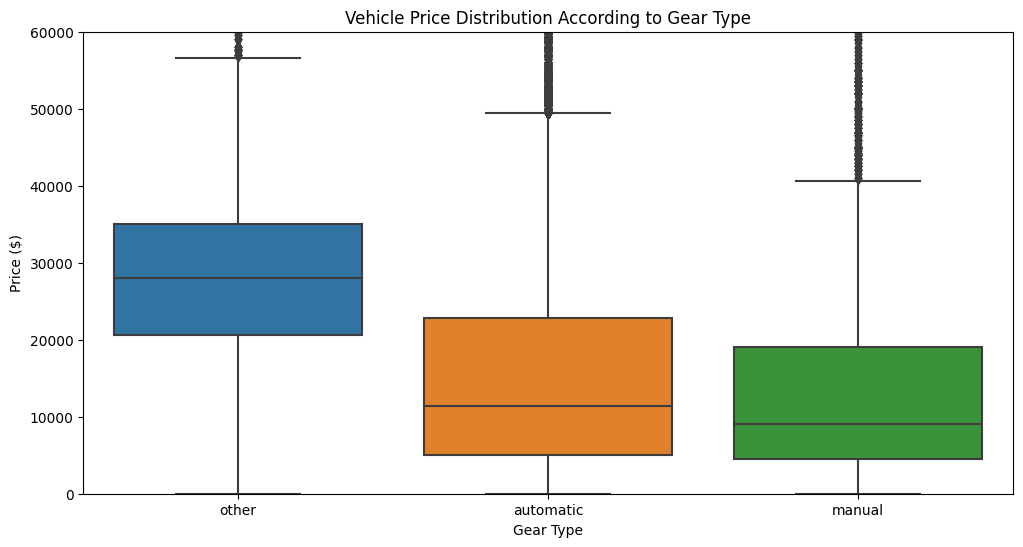

In [9]:
# Vites Tipine Göre Araç Fiyatı Dağılımı | Vehicle Price Distribution According to Gear Type

plt.figure(figsize=(12,6))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Vehicle Price Distribution According to Gear Type')
plt.xlabel('Gear Type')
plt.ylabel('Price ($)')
plt.ylim(0, 60000)
plt.show()

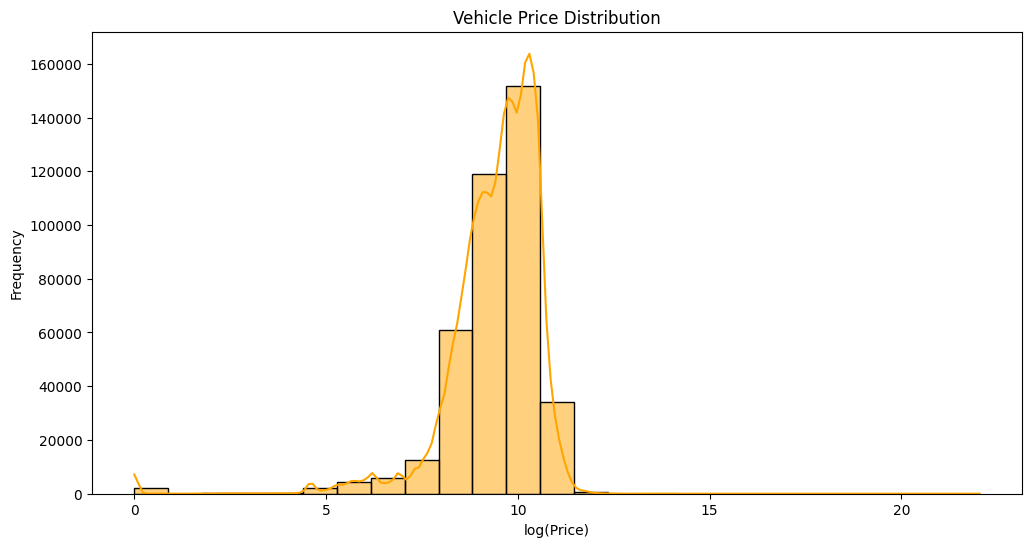

In [10]:
# Araç Fiyat Dağılımı | Vehicle Price Distribution

# 0'dan büyük fiyatlar için log dönüşümü | Log transformation for prices greater than 0
df_log = df[df['price'] > 0].copy()
df_log['log_price'] = np.log(df_log['price'])

plt.figure(figsize=(12,6))
sns.histplot(df_log['log_price'], bins=25, kde=True, color='orange')
plt.title('Vehicle Price Distribution')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
#plt.ylim(0, 60000)
plt.show()

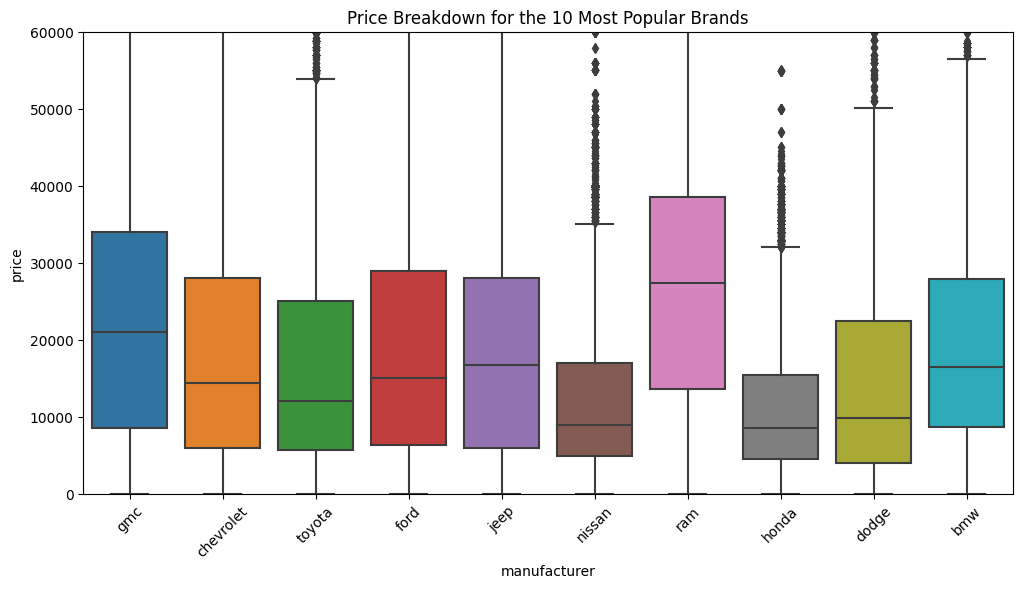

In [11]:
# En Popüler 10 Markanın Fiyat Dağılımı | Price Breakdown for the 10 Most Popular Brands

# Marka bazlı ortalama fiyat | Average price by brand
plt.figure(figsize=(12,6))
top_brands = df['manufacturer'].value_counts().nlargest(10).index
sns.boxplot(x='manufacturer', y='price', data=df[df['manufacturer'].isin(top_brands)])
plt.title('Price Breakdown for the 10 Most Popular Brands')
plt.xticks(rotation=45)
plt.ylim(0, 60000)
plt.show()

### * Eksik Veriler Üzerinde Çalışma | Working on Missing Data

In [12]:
# Veri Setini Kopyalayalım | Let's Copy the Dataset
df_c1 = df.copy()

In [13]:
# Eksik değerler kontrolü | Missing values check
print("\nMissing values check:")
print(df_c1.isnull().sum())


Missing values check:
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [14]:
# Eksik Değer Sayısı ve Oranı | Number and Rate of Missing Values
missing_counts = df_c1.isnull().sum()
missing_ratio = (df_c1.isnull().sum() / len(df_c1)) * 100

missing_df_c1 = pd.DataFrame({'Missing Counts': missing_counts, 'Rate (%)': missing_ratio})
missing_df_c1 = missing_df_c1[missing_df_c1['Missing Counts'] > 0].sort_values(by='Rate (%)', ascending=False)

missing_df_c1

,Missing Counts,Rate (%)
county,426880,100.000000
size,306361,71.767476
cylinders,177678,41.622470
condition,174104,40.785232
VIN,161042,37.725356
drive,130567,30.586347
paint_color,130203,30.501078
type,92858,21.752717
manufacturer,17646,4.133714
title_status,8242,1.930753


In [15]:
# Gereksiz ve Çok Eksik Sütunları Silelim | Let's Delete Unnecessary and Missing Columns
drop_cols = ['url',
             'region', 
             'region_url', 
             'image_url', 
             'county',
             'state', 
             'posting_date', 
             'VIN', 
             'description',  
             'lat', 
             'long']
df_c1 = df_c1.drop(columns=drop_cols, errors='ignore')

In [16]:
# En çok kullanılan ilk 50 modeli al, diğerlerini "other" olarak ata
# Take the top 50 most used models, assign the rest to "other"
top_models = df_c1['model'].value_counts().nlargest(50).index
df_c1['model'] = df_c1['model'].apply(lambda x: x if x in top_models else 'other')

In [17]:
# Önemli eksik verileri dolduralım | Let's fill in important missing data

# Sayısal alanlar | Numeric fields
df_c1.dropna(subset=['model'], inplace=True)  # model çok önemli | The model is very important
df_c1['odometer'].fillna(df_c1['odometer'].median(), inplace=True)

# Kategorik alanlar | Categorical fields
df_c1['condition'].fillna('unknown', inplace=True)
df_c1['drive'].fillna(df_c1['drive'].mode()[0], inplace=True)
df_c1['type'].fillna('unknown', inplace=True)
df_c1['title_status'].fillna(df_c1['title_status'].mode()[0], inplace=True)
df_c1['fuel'].fillna('unknown', inplace=True)
df_c1['transmission'].fillna('unknown', inplace=True)
df_c1['size'].fillna('unknown', inplace=True)
df_c1['paint_color'].fillna('unknown', inplace=True)
df_c1['cylinders'].fillna('unknown', inplace=True)

# Kıyaslama: "unknown" ve "NaN"

# NAN
# Model NaN'ı doğrudan desteklemiyor (örneğin LinearRegression, RandomForest, sklearn) :	❌ HATA verir
# Eksikliği bir kategori gibi değerlendirmek istiyorsan	 : ❌ Anlamlı olmaz
# One-hot encoding kullanacaksan : NaN kaybolur, bilgi kaybı olur
# Sayısal sütunsa :	Genelde median/mean ile doldur	

# "unknown"
# Model NaN'ı doğrudan desteklemiyor (örneğin LinearRegression, RandomForest sklearn) :	✅ Sorunsuz çalışır
# Eksikliği bir kategori gibi değerlendirmek istiyorsan	 : ✅ Anlamlıdır ("bilinmiyor" etiketi olur)
# One-hot encoding kullanacaksan : ✅ "unknown" ayrı bir sütun olur
# Sayısal sütunsa :	❌ "unknown" kullanılmaz	


In [18]:
# Sıfır veya negatif fiyatları temizle | Clear zero or negative prices
df_c1 = df_c1[df_c1['price'] > 0]

In [19]:
# Önemli sütunlarda eksik varsa silmek daha mantıklı | If there are missing important columns, it makes more sense to delete them.
df_c1 = df_c1.dropna(subset=['price', 'year', 'manufacturer'])

In [20]:
# Veri Setini Kopyalayalım | Let's Copy the Dataset
df_c2 = df_c1.copy()

In [21]:
# One-Hot Encoding (Model için uygun hale getirme | Optimizing for the model)
df_c2_encoded = pd.get_dummies(df_c2,
    columns=['manufacturer', 'model', 'condition', 'fuel', 'title_status', 
             'transmission', 'drive', 'type', 'paint_color', 'cylinders', 'size'],
    drop_first=True)

In [22]:
# Log dönüşümü | Log transformation
df_c2_encoded['log_price'] = np.log(df_c2_encoded['price'])

In [23]:
# Hedef değişkeni ve özellikleri ayıralım | Let's separate the target variable and features
X = df_c2_encoded.drop(columns=['price', 'log_price'], errors='ignore')
y = df_c2_encoded['log_price']  # log_price hedef değişken | target variable

In [24]:
X = X.fillna(0)

## Training/Testing Distinction

In [25]:
# %80 eğitim - %20 Test Verisi Olarak Ayıralım | Let's separate it as 80% training - 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [26]:
def evaluate_regression_model(y_true, y_pred, model_name="Model"):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE:  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R^2:  {r2:.3f}\n")

    return {'Model': model_name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

## Modelling

### Ridge Regression

In [27]:
model_RR = Ridge(alpha=1.0)
model_RR.fit(X_train, y_train)

y_pred_RR = model_RR.predict(X_test)
results_RR = evaluate_regression_model(y_test, y_pred_RR, "Ridge Regression")

Ridge Regression Performance:
MAE:  0.582
RMSE: 1.038
R^2:  0.278



### Random Forest Regression

In [29]:
model_RF = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1)
model_RF.fit(X_train, y_train)
y_pred_RF = model_RF.predict(X_test)

results_RF = evaluate_regression_model(y_test, y_pred_RF, "Random Forest Regression")

Random Forest Regression Performance:
MAE:  0.333
RMSE: 0.714
R^2:  0.659



### Gradient Boosting Regression

In [31]:
model_GB = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model_GB.fit(X_train, y_train)
y_pred_GB = model_GB.predict(X_test)

results_GB = evaluate_regression_model(y_test, y_pred_GB, "Gradient Boosting Regression")

Gradient Boosting Regression Performance:
MAE:  0.426
RMSE: 0.875
R^2:  0.488



### Comparison Table

In [34]:
results = []

# Ridge Regression
y_pred_RR = model_RR.predict(X_test)
results.append(evaluate_regression_model(y_test, y_pred_RR, "Ridge Regression"))

# Random Forest
y_pred_RF = model_RF.predict(X_test)
results.append(evaluate_regression_model(y_test, y_pred_RF, "Random Forest"))

# Gradient Boosting
y_pred_GB = model_GB.predict(X_test)
results.append(evaluate_regression_model(y_test, y_pred_GB, "Gradient Boosting"))

results_df = pd.DataFrame(results)
print(results_df)

Ridge Regression Performance:
MAE:  0.582
RMSE: 1.038
R^2:  0.278

Random Forest Performance:
MAE:  0.333
RMSE: 0.714
R^2:  0.659

Gradient Boosting Performance:
MAE:  0.426
RMSE: 0.875
R^2:  0.488

               Model       MAE      RMSE        R2
0   Ridge Regression  0.582231  1.038221  0.278260
1      Random Forest  0.333061  0.713841  0.658803
2  Gradient Boosting  0.426033  0.874806  0.487582


## Summary

Projenin amacı, ikinci el araç fiyatlarını tahmin etmekti. Bu amaçla çeşitli regresyon modelleri test edildi. Her modelin tahmin doğruluğu farklı oldu. Yukarıda performansların genel bir değerlendirmesi yer almakta:

Yorum:
- Ridge Regression doğrusal bir modeldir. Veriler arasındaki ilişkilerin doğrusal olmaması nedeniyle bu model, karmaşık örüntüleri yakalayamadı. Bu nedenle R² değeri sadece 0.278 olarak kaldı ve tahmin hataları yüksekti.

- Gradient Boosting, genellikle yüksek doğruluk sağlar; ancak bu veri setinde Random Forest kadar başarılı olamadı. MAE ve RMSE değerleri Random Forest’a göre daha kötü, R² değeri de daha düşüktür (0.487).

- Random Forest açık ara en iyi performansı göstermiştir:  
    * En düşük MAE: 0.333 – Ortalama mutlak hata oldukça düşük.
    * En düşük RMSE: 0.714 – Kök ortalama kare hatası, tahminlerin sapmalarının daha az olduğunu gösteriyor.
    * En yüksek R²: 0.659 – Model, verideki toplam varyansın yaklaşık %66’sını açıklayabiliyor.

Seçilen Model:
Bu regresyon probleminde Random Forest modeli hem hata oranlarının düşüklüğü hem de yüksek R² performansı ile en iyi model olarak öne çıkmaktadır.

---------------------------

The objective of this project was to predict the prices of used cars. For this purpose, several regression models were tested. Each model exhibited different levels of prediction accuracy. Below is a general evaluation of their performance:

Comments:

* Ridge Regression is a linear model. Since the relationships within the data are not purely linear, this model failed to capture complex patterns. As a result, its R² score remained relatively low at 0.278, and the prediction errors were higher.

* Gradient Boosting typically delivers high accuracy, but in this dataset, it did not perform as well as Random Forest. Both its MAE and RMSE scores were higher, and the R² score was lower at 0.487.

* Random Forest clearly outperformed the other models:

     * Lowest MAE: 0.333 – indicating a low average prediction error

     * Lowest RMSE: 0.714 – suggesting minimal deviation in predictions

     * Highest R²: 0.659 – meaning the model explains approximately 66% of the variance in the target variable

Selected Model:
In this regression task, Random Forest emerged as the best-performing model due to its low error metrics and superior R² score.